# Cálculo mejorado de $\pi$ en paralelo
### LEE ATENTAMENTE ESTE `notebook` EJECUTANDO SUS CELDAS. COMPLETA Y CONTESTA LAS CELDAS QUE CORRESPONDAN

Asegúrate de que estás ejecutando el código de este _notebook_ en la máquina y desde el directorio que quieres

**$\rightarrow$ ejecuta** (`shift` + `return`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

!echo "HOSTNAME     " `hostname`; 
!echo "CURRENT DIR  " `pwd`

HOSTNAME      sparkvm
CURRENT DIR   /home/vagrant/share/teaching/parallel-computing/ucaldas.20162/student


# Cálculo de $\pi$ con _padding_
# TAREA: Especifica la cantidad correcta de _padding_</font>

**$\rightarrow$ modifica y salva el siguiente código ** (`shift` + `return`)

In [2]:
%%writefile files/pi_spmd_pad.c

/**
  Based on Tim Mattons' tutorial at Intel
  https://software.intel.com/en-us/courseware/249662
**/

#include <stdio.h>
#include <omp.h>

#define MAX_THREADS 32

static long num_steps = 100000000;
double step;
int main ()
{
    // ESPECIFICA LA CANTIDAD CORRECTA DE PADDING AQUI
    long pad = 1;

    int i,j;
    double pi, full_sum = 0.0;
    double start_time, run_time;
    
    double sum[MAX_THREADS * pad];

    step = 1.0/(double) num_steps;

    printf("pi secs nthreads\n");

    j=4;

    for (j=1;j<=MAX_THREADS ;j++) {
        omp_set_num_threads(j);
        full_sum=0.0;
        start_time = omp_get_wtime();

        #pragma omp parallel private(i)
        {
            int id = omp_get_thread_num();
            int numthreads = omp_get_num_threads();
            double x;

            sum[id*pad] = 0.0;

            for (i=id;i< num_steps; i+=numthreads){
                x = (i+0.5)*step;
                sum[id*pad] = sum[id*pad] + 4.0/(1.0+x*x);            
            }
        }

        for(full_sum = 0.0, i=0;i<j;i++)
            full_sum += sum[i*pad];

        pi = step * full_sum;
        run_time = omp_get_wtime() - start_time;
        printf("%f %f %d\n",pi,run_time,j);
    }


}

Writing files/pi_spmd_pad.c


In [3]:
!make -f m/Makefile-p2.3.1 clean all

rm -rf *.o files/pi_spmd_pad /home/vagrant/share/teaching/parallel-computing/ucaldas.20162/student/utils/*.o
--------------------------------------
- bulding files/pi_spmd_pad
--------------------------------------
INCLUDES /home/vagrant/share/teaching/parallel-computing/ucaldas.20162/student/utils
SOURCES files/pi_spmd_pad.c	 /home/vagrant/share/teaching/parallel-computing/ucaldas.20162/student/utils/rlxutils.c
ROOT DIR /home/vagrant/share/teaching/parallel-computing/ucaldas.20162/student/utils
gcc -c -fopenmp -D LINUX -I/home/vagrant/share/teaching/parallel-computing/ucaldas.20162/student/utils files/pi_spmd_pad.c -o files/pi_spmd_pad.o
INCLUDES /home/vagrant/share/teaching/parallel-computing/ucaldas.20162/student/utils
SOURCES files/pi_spmd_pad.c	 /home/vagrant/share/teaching/parallel-computing/ucaldas.20162/student/utils/rlxutils.c
ROOT DIR /home/vagrant/share/teaching/parallel-computing/ucaldas.20162/student/utils
gcc -c -fopenmp -D LINUX -I/home/vagrant/share/teaching/parallel-co

In [4]:
!./files/pi_spmd_pad > files/pad.data

pi mean 3.141593


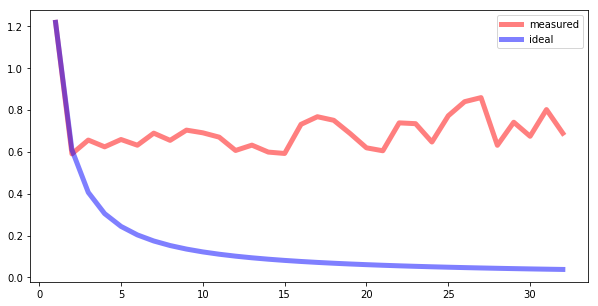

In [5]:
df = pd.read_csv("files/pad.data", sep=" ")
secs     = df['secs']
nthreads = df['nthreads']
pi       = df['pi']
print "pi mean", np.mean(pi)
ideal_secs = secs[0] / nthreads
ax = plt.figure(figsize=(10,5)).add_subplot(111)
ps, = ax.plot(nthreads, secs, linewidth=5, alpha=0.5, c="red")
pi, = ax.plot(nthreads, ideal_secs, linewidth=5, alpha=0.5, c="blue")
ax.legend([ps,pi],["measured", "ideal"])

# TAREA: Implementa el cálculo de $\pi$ usando `omp atomic` o bien `omp critical` 
Usa para ello una variable privada para cada thread en la que acumula su suma parcial


In [ ]:
%%writefile files/pi_spmd_final.c

/**
  Based on Tim Mattons' tutorial at Intel
  https://software.intel.com/en-us/courseware/249662
**/

#include <stdio.h>
#include <omp.h>

#define MAX_THREADS 32

static long num_steps = 10000000;
double step;
int main ()
{
    int i,j;
    double pi, full_sum = 0.0;
    double start_time, run_time;
    
    step = 1.0/(double) num_steps;

    printf("pi secs nthreads\n");

    j=4;

    for (j=1;j<=MAX_THREADS ;j++) {
        omp_set_num_threads(j);
        full_sum=0.0;
        start_time = omp_get_wtime();

        // --- INSERTA TU CODIGO AQUI

        run_time = omp_get_wtime() - start_time;
        printf("%f %f %d\n",pi,run_time,j);
    }


}

In [ ]:
!make -f m/Makefile-p2.3.2 clean all

In [ ]:
!./files/pi_spmd_final > files/final.data

In [ ]:
df = pd.read_csv("files/final.data", sep=" ")
secs     = df['secs']
nthreads = df['nthreads']
pi       = df['pi']
print "pi mean", np.mean(pi)
ideal_secs = secs[0] / nthreads
ax = plt.figure(figsize=(10,5)).add_subplot(111)
ps, = ax.plot(nthreads, secs, linewidth=5, alpha=0.5, c="red")
pi, = ax.plot(nthreads, ideal_secs, linewidth=5, alpha=0.5, c="blue")
ax.legend([ps,pi],["measured", "ideal"])